In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [32]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['project_length'] = (df['deadline'] - df['launched']).dt.days
df['goal_met'] = pd.to_numeric(df['usd_pledged_real']) >= pd.to_numeric(df['usd_goal_real'])

final_df = df[['project_length', 'usd_goal_real', 'goal_met']].sample(n=500)
final_df

project_length  usd_goal_real  goal_met
96902               68        8000.00     False
245678              29        8500.00      True
15636               29       10000.00     False
255105              29        5000.00      True
50395               89        1200.00      True
190338              29       43788.11     False
89043               29       45000.00     False
97826               55        2000.00      True
357941              59       14000.00     False
133754              20      158383.22     False
49261               27         750.00      True
127749              29        3500.00     False
143210              30       41320.85     False
185026              44        5000.00      True
357511              16        7273.50     False
101832              29        1000.00     False
138081              37       11000.00      True
181461              16       30000.00     False
51553               21        1000.00      True
48548               29        1000.00      True
276980              49        1000.00      True
157054              29       14700.00      True
81751               16        1000.00      True
124964              19        2147.40      True
264007              44        1311.92     False
253652               6          99.00      True
40019               44       25000.00     False
210579              29        5000.00     False
272956              29       10000.00     False
273600              59       33725.11     False
...                ...            ...       ...
364589              31        2500.00      True
144645              29        6000.00     False
210729              25        2200.00      True
38526               34        5000.00     False
257257              44        3740.00      True
248328              29        7500.00     False
24840               38        2500.00     False
158262              29       10000.00     False
191798              27       86266.39     False
363944              29        1500.00     False
309322              29       55000.00     False
192003              27        7500.00     False
319985              43        3259.19     False
154759              28         162.44     False
76956                9         550.00      True
233814              29       16802.96      True
310698              29     1000000.00     False
315458              29       27894.00     False
248221              29       25000.00     False
50210               29        1000.00      True
139756              59        1982.08     False
307248              59        5000.00     False
203765              29        5678.00     False
368727              36        3600.00     False
22601               59        7000.00     False
268336              21       10000.00     False
127542              59        3000.00     False
305156              27        4466.61      True
210602              33        1000.00     False
197014              29         200.00     False

[500 rows x 3 columns]

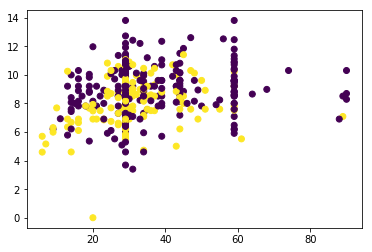

In [33]:
plt.scatter(x=final_df['project_length'], y=np.log(final_df['usd_goal_real']), c=final_df['goal_met'])

In [29]:
final_df[np.log(final_df['usd_goal_real']) < 2]

project_length  usd_goal_real  goal_met
335018              29           1.34      True
325980              35           1.00      True